In [42]:
import pandas as pd
import numpy as np
import seaborn as sns


In [33]:
train = pd.read_csv("https://raw.githubusercontent.com/tamanna18/Titanic-Survival-prediction/main/data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/tamanna18/Titanic-Survival-prediction/main/data/test.csv")

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df = pd.concat([train.drop(columns = ['Survived']), test]).sample(1309) #shuffling

<Axes: ylabel='Density'>

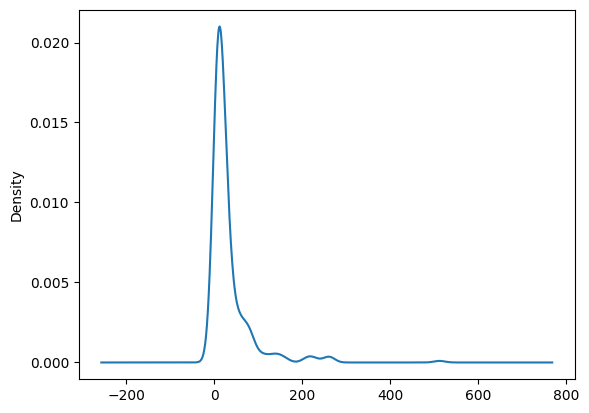

In [36]:
df['Fare'].plot(kind = 'kde')

*Right skewed*

In [44]:
#sample size = 50
# Number of samples = 100

samples = []
for i in range(100):
    samples.append(df['Fare'].dropna().sample(50).values.tolist())

len(samples)

100

In [45]:
#converting into 2D numpy array

samples = np.array(samples)

#### Finding mean of each sample

In [46]:
sample_mean = samples.mean(axis = 1)#mean of each row 

<Axes: ylabel='Density'>

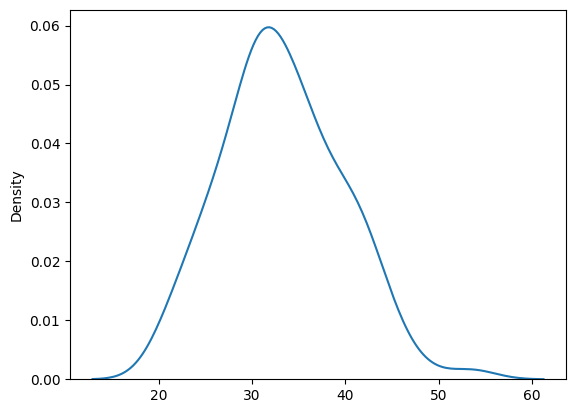

In [47]:
sns.kdeplot(sample_mean)

*Sample mean follows a normal distribution beacause of CLT*

## Finding population mean using sample mean

In [48]:
sample_mean.mean()

33.22707698

In [49]:
# to verify let's find the mean of the population

df['Fare'].dropna().mean()

33.29547928134557

*`Conclusion` : Sample mean is approximately equal to the population mean*

#### Finding Variance of each sample

In [52]:
sample_var = (samples.std())**2

In [61]:
sample_var

2567.6806467458164

## Finding population variance using sample variance

In [55]:
sample_var/50

51.35361293491633

In [54]:
df['Fare'].dropna().std()

51.75866823917416

#### Confidence interval of mean at 95%

In [69]:
lower_limit = sample_mean.mean() - 2*sample_mean.std()/np.sqrt(50)
upper_limit = sample_mean.mean() + 2*sample_mean.std()/np.sqrt(50)

In [70]:
print("The range is", lower_limit, '-', upper_limit)

The range is 31.417352736577655 - 35.036801223422344
